In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def loadImages(dirName):
    data = []
    label = []

    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = Image.open(os.path.join(root, file))
            face = np.asarray(face).flatten()
            data.append(face)
            label.append(file.split('.')[1])

    return np.asarray(data), label

In [3]:
train_data, train_label = loadImages('FACES/train')
test_data, test_label = loadImages('FACES/test')

print("number of train data images is", train_data.shape[0],
      "and number of features for each image is", train_data.shape[1])

number of train data images is 154 and number of features for each image is 65536


## 1.

In [4]:
pca = PCA(n_components=20)
pca.fit(train_data)
components = pca.components_

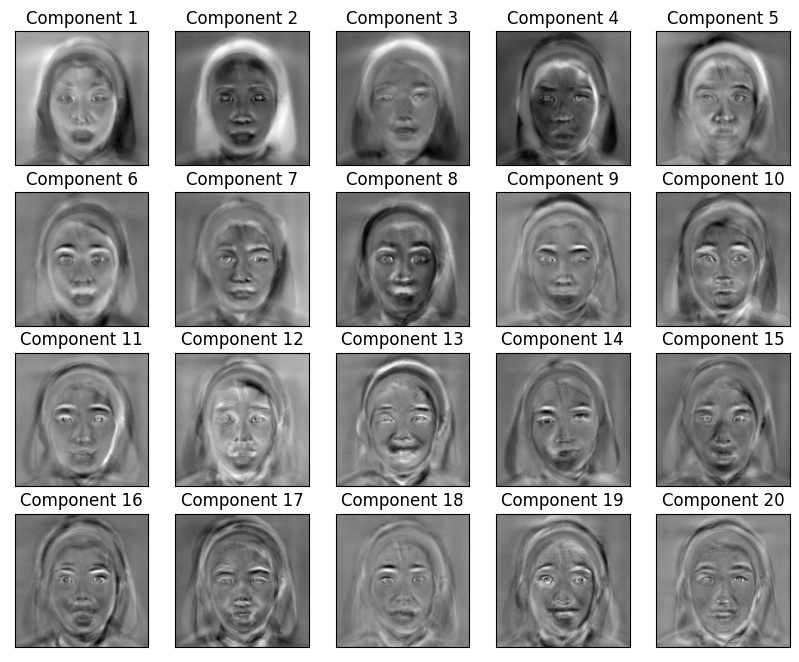

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(components[i].reshape(256, 256), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Component {i+1}')

plt.show()

## 2.

In [6]:
le = LabelEncoder()
y_train = le.fit_transform(train_label)

X_ = train_data[y_train==1]
X_.shape

(18, 65536)

In [7]:
pca_ = PCA(n_components = X_.shape[0])
pca_.fit(X_)
components = pca_.components_

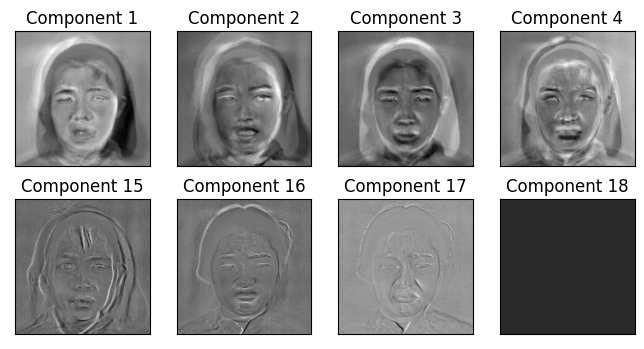

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 4))

for i in range(4):
    ax = axes[0, i]
    ax.imshow(components[i].reshape(256, 256), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Component {i+1}')

for i in range(4):
    ax = axes[1, i]
    ax.imshow(components[X_.shape[0] - 4 + i].reshape(256, 256), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Component {X_.shape[0] - 3 + i}')

plt.show()

## 3.

In [9]:
K = 2
y_test = le.transform(test_label)

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_data, y_train)
y_pred = knn.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
print('K =', K)
print(f'Accuracy: {accuracy:.2f}')

K = 2
Accuracy: 0.63


In [10]:
K = 2

pca = PCA(n_components=59)
train_pca = pca.fit_transform(train_data)

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_pca, y_train)
y_pred = knn.predict(pca.transform(test_data))

accuracy = accuracy_score(y_test, y_pred)
print('K =', K)
print(f'Accuracy: {accuracy:.2f}')

K = 2
Accuracy: 0.64


In [11]:
K = 1

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_data, y_train)
y_pred = knn.predict(test_data)

accuracy = accuracy_score(y_test, y_pred)
print('K =', K)
print(f'Accuracy: {accuracy:.2f}')

K = 1
Accuracy: 0.85


In [12]:
K = 1

pca = PCA(n_components=59)
train_pca = pca.fit_transform(train_data)

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(train_pca, y_train)
y_pred = knn.predict(pca.transform(test_data))

accuracy = accuracy_score(y_test, y_pred)
print('K =', K)
print(f'Accuracy: {accuracy:.2f}')

K = 1
Accuracy: 0.85
